<div style="text-align:center;margin-bottom:50px;">
    <img src="img/LogoSingleRow.png" style="max-width:600px;">
</div>

# Regression with PyCaret

## Dataset loading and preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/RealEstate.csv')
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [3]:
df.drop(['No', 'X1 transaction date'], axis=1, inplace=True)
df.columns = ['Age', 'DistanceToMTR', 'NumStores', 'Latitude', 'Longitude', 'UnitPrice']
df.head()

Age  DistanceToMTR  NumStores  Latitude  Longitude  UnitPrice
0  32.0       84.87882         10  24.98298  121.54024       37.9
1  19.5      306.59470          9  24.98034  121.53951       42.2
2  13.3      561.98450          5  24.98746  121.54391       47.3
3  13.3      561.98450          5  24.98746  121.54391       54.8
4   5.0      390.56840          5  24.97937  121.54245       43.1

In [4]:
import matplotlib.pyplot as plt

(array([ 28.,  95., 111., 115.,  52.,   9.,   3.,   0.,   0.,   1.]),
 array([  7.6 ,  18.59,  29.58,  40.57,  51.56,  62.55,  73.54,  84.53,
         95.52, 106.51, 117.5 ]),
 <a list of 10 Patch objects>)

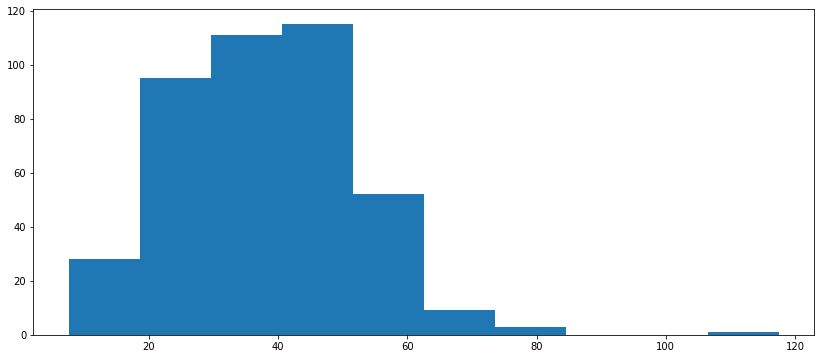

In [5]:
plt.figure(figsize=(14, 6))
plt.hist(df['UnitPrice'])

In [6]:
df = df[df['UnitPrice'] <= 70]

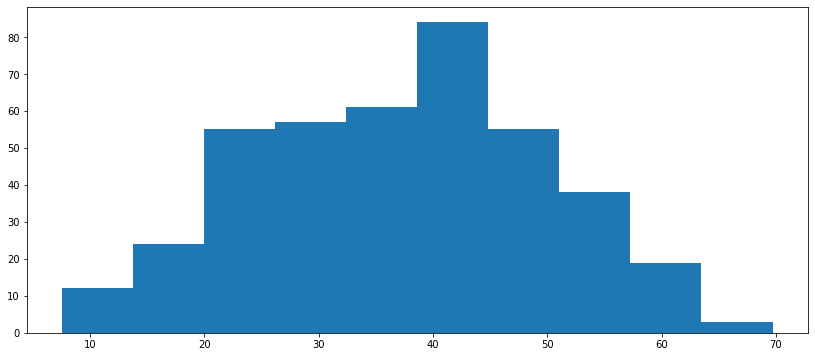

In [7]:
plt.figure(figsize=(14, 6))
plt.hist(df['UnitPrice']);

<br><br>

## Model setup

In [8]:
from pycaret.regression import *

exp_reg = setup(df, target='UnitPrice')

 
Setup Succesfully Completed!


In [9]:
compare_models()

In [10]:
model = create_model('rf')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     4.9195  57.6994  7.5960  0.6776  0.1822  0.1279
1     4.0895  26.1435  5.1131  0.7808  0.1306  0.1153
2     4.0948  34.7829  5.8977  0.6950  0.1756  0.1379
3     5.2044  41.0942  6.4105  0.6955  0.1554  0.1308
4     5.0127  38.1799  6.1790  0.6409  0.1761  0.1572
5     5.0027  43.0116  6.5583  0.7151  0.1834  0.1513
6     4.6406  30.2916  5.5038  0.8285  0.1658  0.1507
7     4.2567  39.8303  6.3111  0.7228  0.1792  0.1249
8     4.1396  26.9398  5.1904  0.8001  0.1349  0.1046
9     5.4990  48.8697  6.9907  0.5612  0.1811  0.1478
Mean  4.6859  38.6843  6.1751  0.7117  0.1664  0.1349
SD    0.4880   9.3396  0.7437  0.0747  0.0187  0.0163

<br><br>

## Model tuning

In [11]:
tuned_model = tune_model('rf')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     4.2766  45.2716  6.7284  0.7471  0.1649  0.1142
1     4.1982  27.6205  5.2555  0.7684  0.1340  0.1171
2     3.8736  29.5597  5.4369  0.7408  0.1683  0.1345
3     4.7159  29.1519  5.3992  0.7840  0.1351  0.1229
4     4.2289  31.7382  5.6337  0.7014  0.1650  0.1375
5     4.6919  41.1886  6.4178  0.7272  0.1815  0.1436
6     4.3329  27.7918  5.2718  0.8426  0.1509  0.1369
7     4.1666  39.2847  6.2678  0.7266  0.1803  0.1246
8     3.9639  22.8498  4.7801  0.8304  0.1200  0.0992
9     5.2665  48.8756  6.9911  0.5611  0.1783  0.1437
Mean  4.3715  34.3332  5.8182  0.7430  0.1578  0.1274
SD    0.3923   8.2385  0.6938  0.0743  0.0206  0.0137

<br><br>

## Model visualization and evaluation

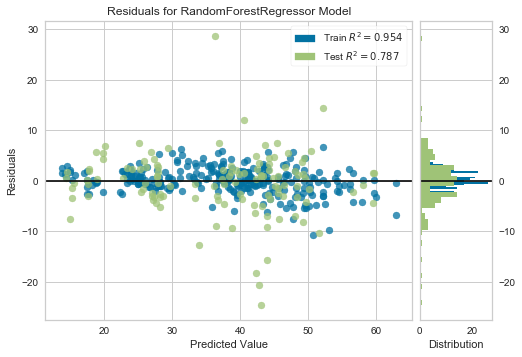

In [12]:
plot_model(tuned_model)

In [13]:
evaluate_model(tuned_model)

Parameters
bootstrap                      True
ccp_alpha                         0
criterion                       mae
max_depth                       110
max_features                   sqrt
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf          0
n_estimators                    250
n_jobs                         None
oob_score                     False
random_state                   7016
verbose                           0
warm_start                    False

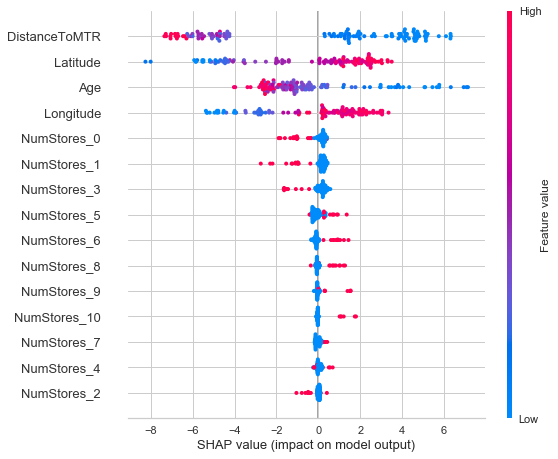

In [14]:
interpret_model(tuned_model)

<br><br>

## Evaluation and saving

In [15]:
predictions = predict_model(tuned_model)

Model     MAE      MSE    RMSE     R2   RMSLE    MAPE
0  Random Forest Regressor  4.1696  38.6485  6.2168  0.787  0.1971  0.1431

In [16]:
finalize_model(tuned_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=110, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=7016, verbose=0, warm_start=False)

In [17]:
save_model(tuned_model, 'realestate_rf')

Transformation Pipeline and Model Succesfully Saved
